# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Load Dataset

In [2]:
file_path = 'E:\\DEN\\Heart_Disease_Prediction.csv'
df = pd.read_csv(file_path)

#  Data Understanding & Preprocessing

## Explore the Dataset

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df.describe()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [6]:
df.isnull().sum()  # Identify missing values

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

## Convert Categorical Variables And ***Feature Selection***

In [10]:
df['Heart Disease']=df['Heart Disease'].map({'Presence':1,'Absence':0})
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
y=df['Heart Disease']
x=df.drop('Heart Disease',axis=1)

In [13]:
model=RandomForestClassifier(random_state=42)
model.fit(x,y)

RandomForestClassifier(random_state=42)

In [14]:
importance=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)

In [15]:
importance

Max HR                     0.123092
Thallium                   0.121931
ST depression              0.121238
Chest pain type            0.108940
Number of vessels fluro    0.108856
Age                        0.093491
Cholesterol                0.083661
BP                         0.077886
Slope of ST                0.048981
Exercise angina            0.048278
Sex                        0.033263
EKG results                0.020929
FBS over 120               0.009454
dtype: float64

In [16]:
df_updated=df[['Age','Chest pain type','BP','Cholesterol','Max HR','ST depression','Number of vessels fluro','Thallium','Heart Disease']]

In [17]:
df_updated.to_csv('df_updated.csv')

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
y=df_updated['Heart Disease']
x=df_updated.drop('Heart Disease', axis=1)

In [20]:
scaler=MinMaxScaler()

x_scaled=scaler.fit_transform(x)

x_scaled=pd.DataFrame(x_scaled, columns=x.columns)

x_scaled.head()

,Age,Chest pain type,BP,Cholesterol,Max HR,ST depression,Number of vessels fluro,Thallium
0,0.854167,1.000000,0.339623,0.447489,0.290076,0.387097,1.000000,0.0
1,0.791667,0.666667,0.198113,1.000000,0.679389,0.258065,0.000000,1.0
2,0.583333,0.333333,0.283019,0.308219,0.534351,0.048387,0.000000,1.0
3,0.729167,1.000000,0.320755,0.312785,0.259542,0.032258,0.333333,1.0
4,0.937500,0.333333,0.245283,0.326484,0.381679,0.032258,0.333333,0.0


In [21]:
x_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    float64
 1   Chest pain type          270 non-null    float64
 2   BP                       270 non-null    float64
 3   Cholesterol              270 non-null    float64
 4   Max HR                   270 non-null    float64
 5   ST depression            270 non-null    float64
 6   Number of vessels fluro  270 non-null    float64
 7   Thallium                 270 non-null    float64
dtypes: float64(8)
memory usage: 17.0 KB


In [22]:
x_scaled.duplicated().sum()

0

In [24]:
df_scaled=pd.concat([x_scaled,y],axis=1)

In [25]:
df_scaled.shape

(270, 9)

# Visualizations

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

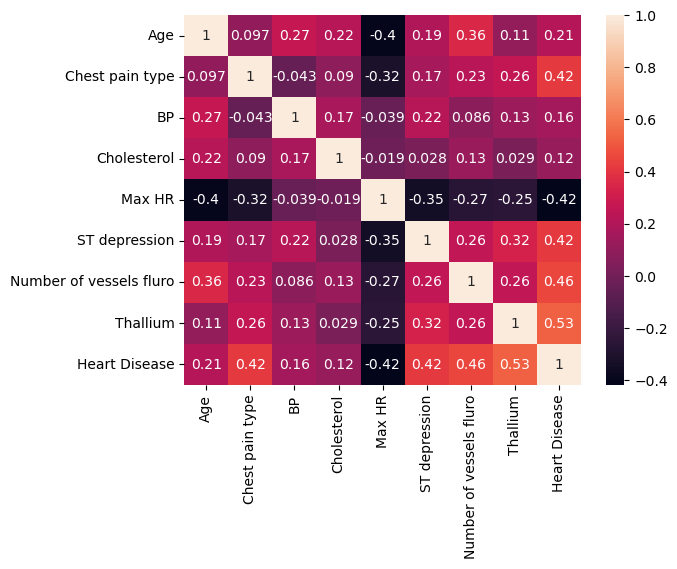

In [27]:
corr=df_scaled.corr()

sns.heatmap(corr, annot=True)
plt.show()

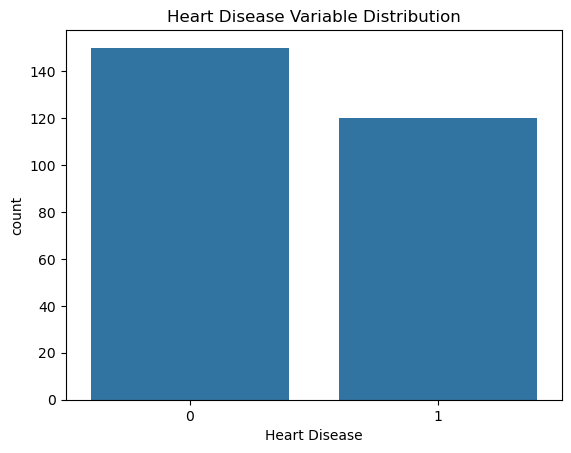

In [28]:
sns.countplot(x='Heart Disease', data=df_scaled)
plt.title("Heart Disease Variable Distribution")
plt.show()

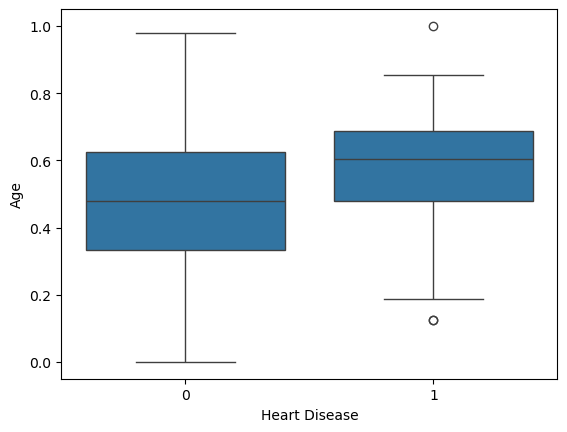

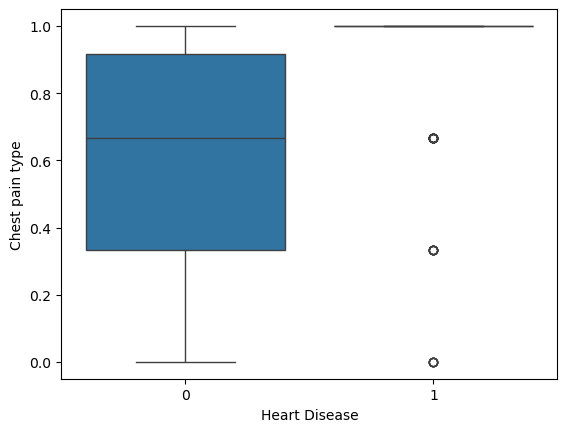

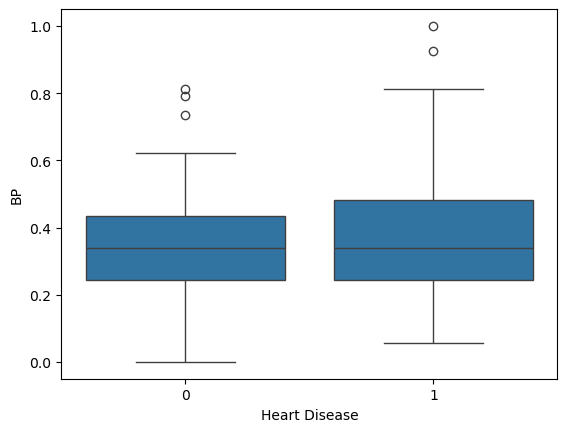

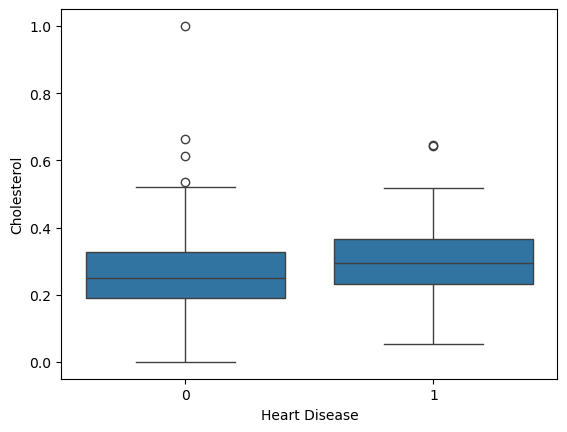

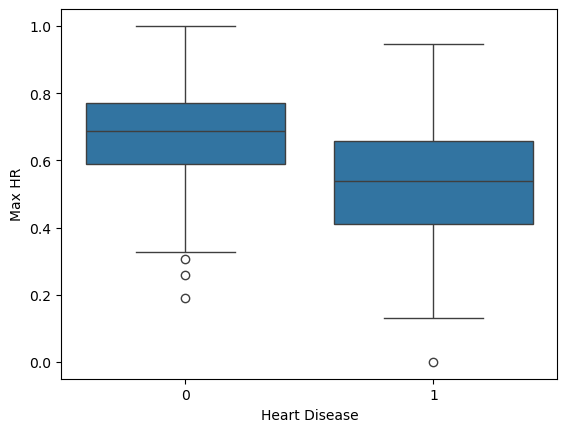

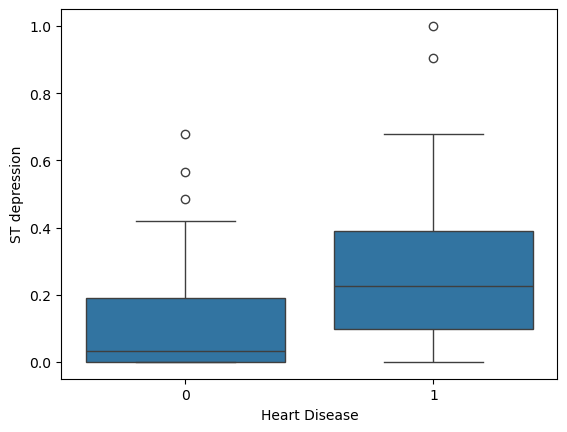

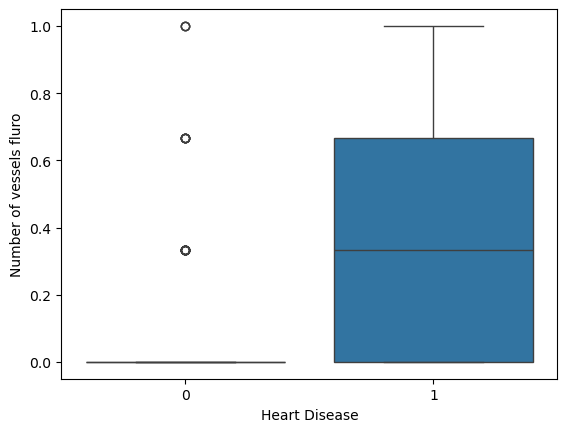

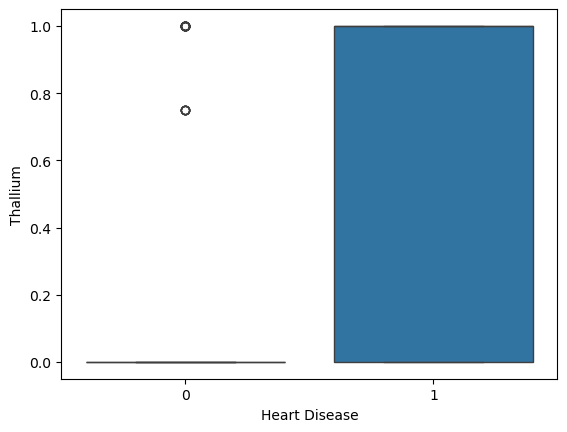

In [29]:
for col in x_scaled.columns:
    sns.boxplot(x='Heart Disease',y=col, data=df_scaled)
    plt.show()

# Model Building & Evaluation

### Prepare Data

In [31]:
y=df_scaled['Heart Disease']
x=df_scaled.drop('Heart Disease', axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.4,random_state=1)

## Train Models
### Decision Tree Classifier

In [32]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=1)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

#### Ploting Tree

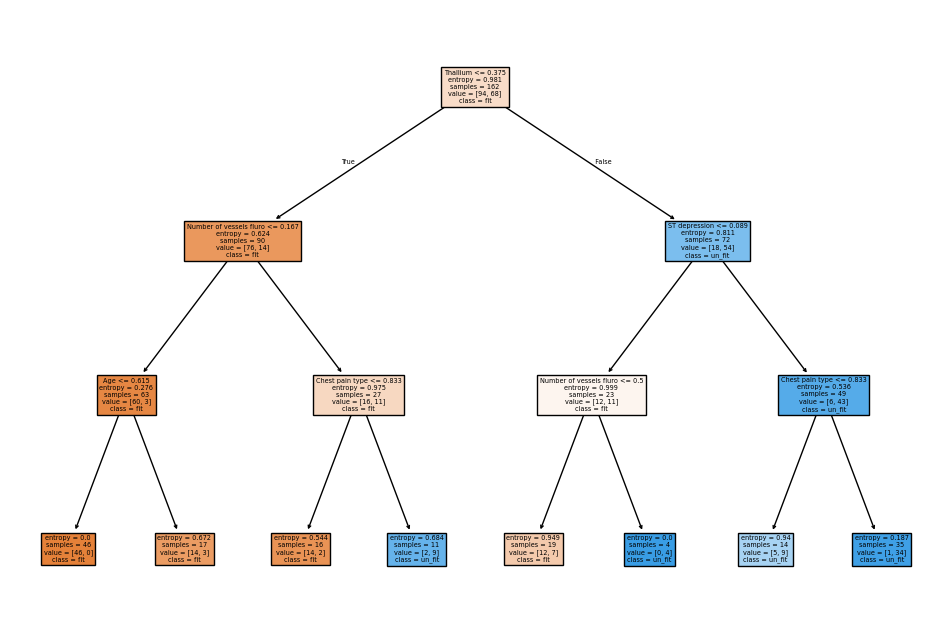

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))  # Set the figure size for better visibility
plot_tree(dtree, feature_names=df_scaled.columns, class_names=["fit","un_fit"], filled=True)

# Display the tree
plt.show()

In [35]:
print(dtree.score(x_train,y_train))
print(dtree.score(x_test,y_test))

0.8765432098765432
0.7777777777777778


In [52]:
rf_pred=dtree.predict(x_test)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.93      0.83        56
           1       0.89      0.65      0.76        52

    accuracy                           0.80       108
   macro avg       0.82      0.79      0.79       108
weighted avg       0.82      0.80      0.79       108



<IPython.core.display.Javascript object>

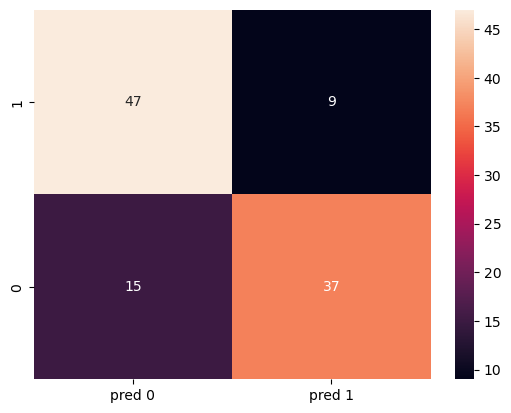

In [38]:
cm=metrics.confusion_matrix(y_test,y_pred, labels=[0,1])
df_cm=pd.DataFrame(cm, index=[1,0],
                       columns=['pred 0','pred 1'])
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

In [39]:
pickle.dump(dtree, open('Dcision_Tree_Model.pkl', 'wb'))

<IPython.core.display.Javascript object>

## KNeighborsClassifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=4, weights='uniform')

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

### Choosing K

In [41]:
from sklearn.model_selection import cross_val_score

score_1=[]

for i in range(1,50):
    knn_2=KNeighborsClassifier(n_neighbors=i)
    score_2=cross_val_score(knn_2,x,y,cv=10)
    score_1.append(score_2.mean())

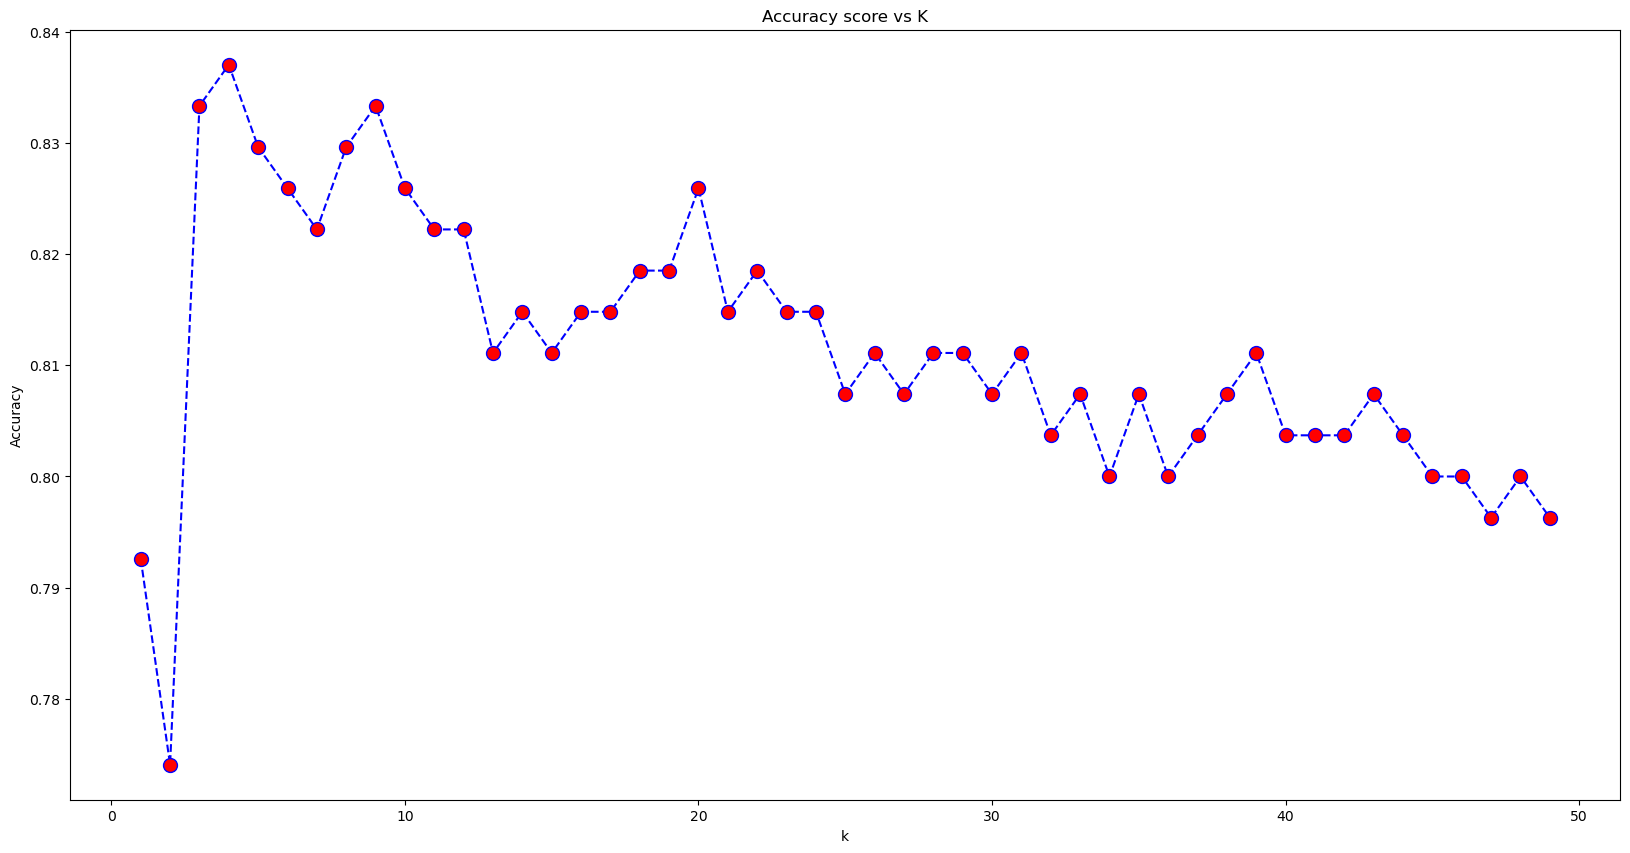

In [42]:
plt.figure(figsize=(20,10))

plt.plot(range(1,50), score_1, color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)

plt.title('Accuracy score vs K')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [43]:
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.8950617283950617
0.7962962962962963


In [50]:
knn_pred=knn.predict(x_test)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.93      0.83        56
           1       0.89      0.65      0.76        52

    accuracy                           0.80       108
   macro avg       0.82      0.79      0.79       108
weighted avg       0.82      0.80      0.79       108



<IPython.core.display.Javascript object>

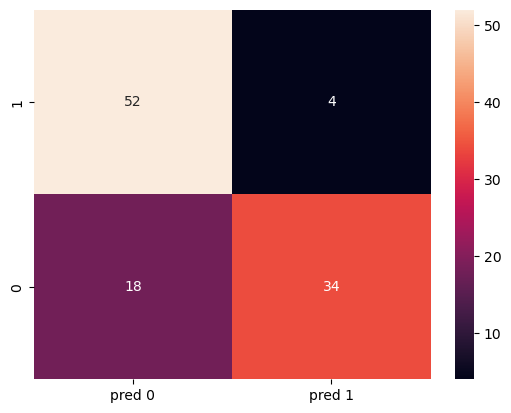

In [46]:
cm=metrics.confusion_matrix(y_test,y_pred, labels=[0,1])
df_cm=pd.DataFrame(cm, index=[1,0],
                       columns=['pred 0','pred 1'])
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

In [47]:
pickle.dump(knn, open('KNN_Model', 'wb'))

<IPython.core.display.Javascript object>

##  Evaluating Models

In [54]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Results for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print("-"*50)

evaluate_model(y_test, knn_pred, "KNeighborsClassifier")

Results for KNeighborsClassifier:
Accuracy: 0.7962962962962963
Precision: 0.8947368421052632
Recall: 0.6538461538461539
F1 Score: 0.7555555555555555
Confusion Matrix:
 [[52  4]
 [18 34]]
              precision    recall  f1-score   support

           0       0.74      0.93      0.83        56
           1       0.89      0.65      0.76        52

    accuracy                           0.80       108
   macro avg       0.82      0.79      0.79       108
weighted avg       0.82      0.80      0.79       108

--------------------------------------------------


In [55]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Results for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print("-"*50)

evaluate_model(y_test, rf_pred, "RandomForestClassifier")

Results for RandomForestClassifier:
Accuracy: 0.7777777777777778
Precision: 0.8043478260869565
Recall: 0.7115384615384616
F1 Score: 0.7551020408163265
Confusion Matrix:
 [[47  9]
 [15 37]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        56
           1       0.80      0.71      0.76        52

    accuracy                           0.78       108
   macro avg       0.78      0.78      0.78       108
weighted avg       0.78      0.78      0.78       108

--------------------------------------------------
